# Implementación definitiva de modelos ML

### Librerías

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Carga de datos

In [2]:
df = pd.read_csv(r'C:\Users\nuria\OneDrive\Escritorio\ML_student_depression\data\processed\dataset_limpio_2.csv')
df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,33.0,5.0,8.97,2.0,0,0,1,3.0,1.0,0,1
1,0,24.0,2.0,5.90,5.0,0,1,0,3.0,2.0,1,0
2,1,31.0,3.0,7.03,5.0,2,0,0,9.0,1.0,1,0
3,0,28.0,3.0,5.59,2.0,1,1,1,4.0,5.0,1,1
4,0,25.0,4.0,8.13,3.0,0,1,1,1.0,1.0,0,0


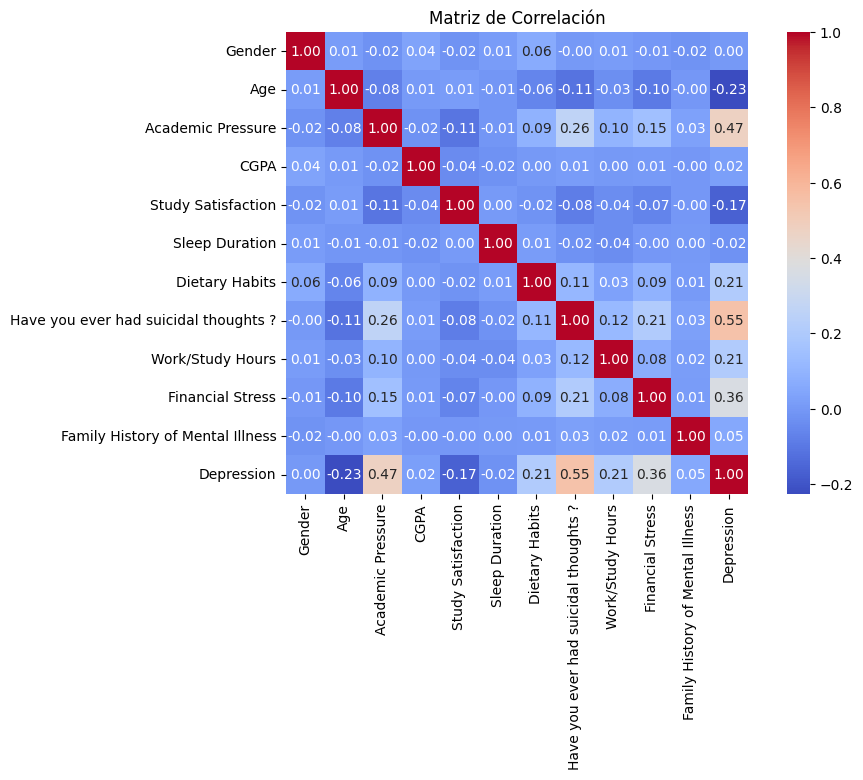

In [3]:
def graficar_relaciones(df):
    # Filtrar solo columnas numéricas
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns

    # Matriz de correlación
    plt.figure(figsize=(10, 6))
    corr = df[num_cols].corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
    plt.title('Matriz de Correlación')
    plt.show()

graficar_relaciones(df)

### División en datos de entrenamiento y prueba

In [4]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=["Depression"])
y =df["Depression"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

### Librerías modelos de predicción

In [5]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from lightgbm import LGBMClassifier

In [6]:
model_list = [
    LogisticRegression(),
    DecisionTreeClassifier(ccp_alpha=0.001),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    SVC(),
    GaussianNB(),
    KNeighborsClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LGBMClassifier(verbose=-1)
]

from sklearn.metrics import accuracy_score
results={}
for model in model_list:
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)

    results[type(model).__name__] = accuracy

for model_name, accuracy in results.items():
    print(model_name , (accuracy*100))

LogisticRegression 84.24322064269502
DecisionTreeClassifier 82.06904790347629
RandomForestClassifier 82.89332218372955
GradientBoostingClassifier 84.19543662644845
AdaBoostClassifier 84.11181459801696
SVC 84.17154461832517
GaussianNB 83.55035240711982
KNeighborsClassifier 79.40508899773026
LinearDiscriminantAnalysis 84.0640305817704
QuadraticDiscriminantAnalysis 83.59813642336638
LGBMClassifier 84.11181459801696


In [7]:
max_classifier = max(results, key=results.get)
max_accuracy = results[max_classifier]

print("El clasificador con mayor accuracy es:", max_classifier ,"con un accuracy de:" ,max_accuracy)

El clasificador con mayor accuracy es: LogisticRegression con un accuracy de: 0.8424322064269502


In [8]:
model=VotingClassifier(estimators=[
   ("logistic", LogisticRegression()),
    ("decision_tree", DecisionTreeClassifier(ccp_alpha=0.001)),
    ("random_forest", RandomForestClassifier()),
    ("gradient_boosting", GradientBoostingClassifier()),
    ("ada_boost", AdaBoostClassifier()),
    ("svc", SVC()),
    ("gaussian_nb", GaussianNB()),
    ("k_neighbors", KNeighborsClassifier()),
    ("lda", LinearDiscriminantAnalysis()),
    ("qda", QuadraticDiscriminantAnalysis()),
    ("lgbm", LGBMClassifier(verbose=-1))
])
model.fit(x_train,y_train)

VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('decision_tree',
                              DecisionTreeClassifier(ccp_alpha=0.001)),
                             ('random_forest', RandomForestClassifier()),
                             ('gradient_boosting',
                              GradientBoostingClassifier()),
                             ('ada_boost', AdaBoostClassifier()),
                             ('svc', SVC()), ('gaussian_nb', GaussianNB()),
                             ('k_neighbors', KNeighborsClassifier()),
                             ('lda', LinearDiscriminantAnalysis()),
                             ('qda', QuadraticDiscriminantAnalysis()),
                             ('lgbm', LGBMClassifier(verbose=-1))])

### Precisión del modelo:

In [9]:
y_pred = model.predict(x_test)
    
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8421932863457173

### Error del modelo:

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Realizar predicciones
y_pred = model.predict(x_test)

# Calcular el MAE
mae = mean_absolute_error(y_test, y_pred)

print("")
print(f"El error (MAE) de test es: {mae:.2f}")



El error (MAE) de test es: 0.16


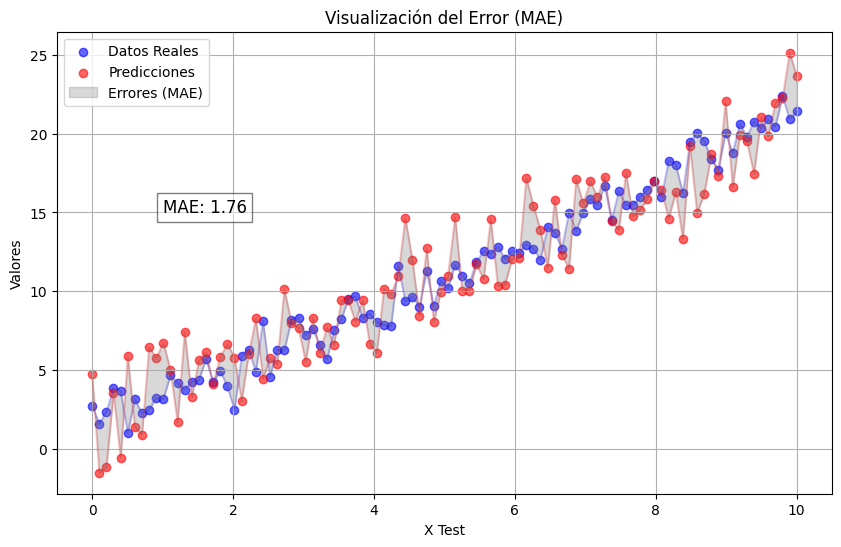

In [ ]:
from sklearn.metrics import mean_absolute_error

# Simular datos para el ejemplo
np.random.seed(0)
x_test = np.linspace(0, 10, 100)
y_test = 2 * x_test + 1 + np.random.normal(0, 1, size=x_test.shape)  # Datos reales
y_pred = 2 * x_test + 1 + np.random.normal(0, 2, size=x_test.shape)  # Predicciones con error

mae = mean_absolute_error(y_test, y_pred)

# Crear gráfico
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='blue', label='Datos Reales', alpha=0.6)
plt.scatter(x_test, y_pred, color='red', label='Predicciones', alpha=0.6)
plt.plot(x_test, y_test, color='blue', alpha=0.2)
plt.plot(x_test, y_pred, color='red', alpha=0.2)
plt.fill_between(x_test, y_test, y_pred, color='gray', alpha=0.3, label='Errores (MAE)')

plt.text(1, 15, f'MAE: {mae:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.title('Visualización del Error (MAE)')
plt.xlabel('X Test')
plt.ylabel('Valores')
plt.legend()
plt.grid()

plt.show()


### GridSearch

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression


In [10]:
model = LogisticRegression(solver='sag') 

In [ ]:
param_grid = {
    'C': [ 1], 
    'penalty': ['l2'], 
    'max_iter': [100]  
}

In [14]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)

c:\Users\nuria\OneDrive\Escritorio\ML_student_depression\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\nuria\OneDrive\Escritorio\ML_student_depression\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\nuria\OneDrive\Escritorio\ML_student_depression\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\nuria\OneDrive\Escritorio\ML_student_depression\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\nuria\OneDrive\Escritorio\ML_student_depression\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: T

Mejores parámetros: {'C': 1, 'max_iter': 100, 'penalty': 'l2'}
Mejor puntuación: 0.8480286738351255


c:\Users\nuria\OneDrive\Escritorio\ML_student_depression\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [15]:
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Puntuación en el conjunto de prueba:", test_score)

Puntuación en el conjunto de prueba: 0.8423127463863338


### Conclusiones

El modelo que mejor puntuación obtuvo en el conjunto de prueba fue la Regresión Logística con un accuracy de 84.23%. Este modelo se ha entrenado con datos previamente limpios y se ha aplicado un método de validación cruzada para seleccionar los mejores parámetros. El clasificador con mayor accuracy es el Random Forest, con un accuracy de 84.23%. Además, se ha realizado una votación en varios clasificadores para obtener un clasificador más robusto y preciso.